In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [8]:
def plot(axes, x, y, title):
    axes.scatter(x, y, s=6)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [9]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data
    
# data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw.head(10)

,size,temperature,job,energy,energy^2,magnetization,magnetization^2,amag
0,20,2.94,2,-336.622151,114812.167933,-14.580568,5298.016793,14.580568
1,20,2.94,10,-336.526190,114686.982807,0.151140,5952.673331,0.151140
2,20,2.94,9,-334.621351,113415.676929,0.516593,4858.379848,0.516593
3,20,2.94,3,-338.638944,116186.651739,-17.118752,5510.434226,17.118752
4,20,2.94,7,-333.850460,112839.241903,3.353858,4732.638145,3.353858
5,20,2.94,5,-336.686126,114809.967213,11.592163,5559.053179,11.592163
6,20,2.94,4,-335.240304,113891.153938,1.333067,4495.998401,1.333067
7,20,2.94,1,-338.371851,115912.412635,-0.502999,5367.038784,0.502999
8,20,2.94,8,-335.360256,113904.953219,-10.327069,5106.325470,10.327069
9,20,2.94,6,-336.937225,115049.647341,7.512995,5255.512195,7.512995


In [13]:
size = 20
temperature = 2.1
job = 1
output_file = f'{size}_size/{temperature:.3}_temp/{job:02}_JOB/output.dat'

run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion', 'aceptados'])
run_data.head()

TypeError: head() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
data = data_raw.groupby(['size','temperature'], as_index=False).mean().drop('job', axis=1)

data['N'] = data['size']**2
data['Cv'] = (data['energy^2']-data['energy']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2']-data['amag']**2)*data['N']/data['temperature']
data['E'] = data['energy'] / data['N']
data['M'] = data['amag'] / data['N']



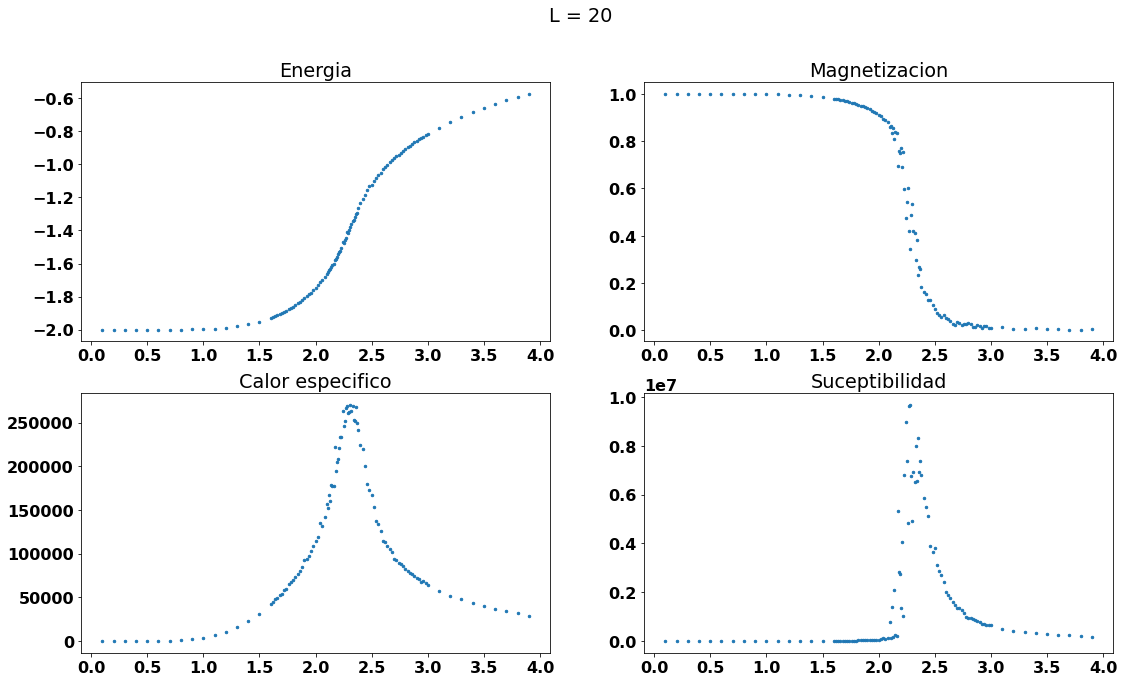

In [ ]:
for s in data['size'].unique():
    dataf = data[data['size']==s]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(f'L = {s}')
    plot(ax2, dataf['temperature'], dataf['M'], 'Magnetizacion')
    plot(ax1, dataf['temperature'], dataf['E'], 'Energia')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')

plt.show()